# What is Machine Learning?
  
According to Tom Mitchell in his seminal book:

> "A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$."

Example: playing checkers.

  * $E$ = the experience of playing many games of checkers
  * $T$ = the task of playing checkers.
  * $P$ = the probability that the program will win the next game.

In general, any machine learning problem can be assigned to one of two broad classifications:

  * Supervised learning (this module) 
  * Unsupervised learning (next module)

## Supervised Learning

In supervised learning, we are given a data set and, for **this** data set (named training data set), we **know** what our correct output should look like. The objective is to learn the relationship between the input and the output.

Supervised learning problems are categorized into "regression" and "classification" problems: 
  * In a **regression** problem, we are trying to predict results within a continuous output, meaning that we are trying to map input variables to some continuous function. 
  * In a **classification** problem, we are instead trying to predict results in a discrete output. In other words, we are trying to map input variables into discrete categories.

### Example 1:

  * Given data about the size of houses on the real estate market, try to predict their price. Price as a function of size is a continuous output, so this is a **regression** problem.

  * We could turn this example into a classification problem by instead making our output about whether the house "sells for more or less than the asking price." Here we are **classifying** the houses based on price into two discrete categories.

### Example 2:

  * **Regression** - Given a picture of a person, we have to predict their age on the basis of the given picture
  * **Classification** - Given a patient with a tumor, we have to predict whether the tumor is malignant or benign based on an x-ray image.

## Linear regression

The goal of linear regression is to find a line that fits our data as best as possible. Unfornutaley, we don't have time to look at the math details, but you can find them in [this book](https://web.stanford.edu/~hastie/ElemStatLearn/). We'll try to pass the intuituin behind this method.

Let's assume that we have a set of pairs $(x_i,y_i)$, where $x$ is the independent variable and $y$ the independent variable. Normaly, $x$ is a $m$-dimenstional vector, where we have $m$ variables describing the instance (e.g., the features computed from the molecules by some feature descriptor). However, for simplicity, we assume for now that $x$ is unidimensional. The independent variable is the one we want to predict (e.g., the energy of the molecule). The picture bellow illustrates this: 


<img src="https://miro.medium.com/max/1600/0*KsvPDcMleBbRUNwL" width="480"/>

The yellow line in the figure corresponds to a model that can be used to predict the value of $y$ from $x$. How do we measure the quality of this model? We need a way to measure the **difference** between real and predicted values (an **error measure**, also known as cost or loss function). Then, we can transform the problem of fiting the best line to the data in a problem of minimizing the error between real values and predictions.  

A common error measure is the **squared loss**. Let $pred_i$ be the value predicted for instance $i$. The squared loss can be computed as:

$$ E = \sum_{i=1}^n (pred_i - y_i)^2 $$

This function basically compute the difference between the real value and the prediction for all the instances:

![](https://media.giphy.com/media/VbnQM59vjG6fYPmBIl/giphy.gif)

And then square these values and sum over all the training data:

![](https://media.giphy.com/media/YlHI3bh3u6hf8oADOq/giphy.gif)

The resons for squaring is three fold:

  1. It eliminates the negative signs. Both positive and negative error should count for the loss, and squaring turn a negative error in a positive error
  1. It amplifies the errors with greater magnitude, thus larger errors counts more than small ones.
  1. The function is continue and differentiable (we will see the importance of this when studying the gradient descent method).  

## Least Squares 

Given an error (loss) function, how do we find the line that minimizes it? Recall that we can represent a line by $\theta_0 + \theta_1 x$ (alternative notatios are $b + mx$ or $b+ ax$), where $\theta_0$ is the intercep and $\theta_1$ the slope. Thus, our objective is to find the line 

$$ pred_i = \theta_0 + \theta_1 x_i$$

that minimizes $E$.

Let's introduce an algebra trick to facilitate the math. Let $\mathbf{x_i} = [1, x_i]$, where we added a dummy variable which which value is allways 1, and $\mathbf{\theta} = [\theta_0, \theta_1]$. Thus, we can write the prediction line as:

$$ pred_i = \mathbf{\theta} ^\intercal \mathbf{x_i} = \begin{bmatrix}
           \theta_0 \\
           \theta_1
         \end{bmatrix} [1, x_i] = \theta_0\cdot 1 + \theta_1 x_i = \theta_0 + \theta_1 x_i$$

Stacking a set of intances, we can form a matrix $X$ where each row $i$ contains a vector $\mathbf{x_i}$. Then, we can compute all predictions at once by computing $X\mathbf{\theta}$. The error function can then be computed as:

$$ E(\mathbf{\theta}) = (X\mathbf{\theta} -y)^\intercal(X\mathbf{\theta} -y)$$

To minimize the error we can compute its derivate:

$$ \frac{\partial E(\mathbf{\theta})}{ \partial \mathbf{\theta}}  = 2X^\intercal X \mathbf{\theta} - 2X^\intercal y$$

By taking $\frac{\partial E}{ \partial \mathbf{\theta}} = 0$ and solving for $\mathbf{\theta}$, we get

$$ \mathbf{\theta} = (X^\intercal X)^{-1} \cdot X^\intercal y$$

This is known as the normal equation of the linear regression. Although we have described it in terms of a single variable, it can be easily extended to multidimensional data.

The code sequence below illustrates the use of python package sklearn to compute a linear regression for the [diabetes data set](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). 






In [1]:
## First, we load the packages 

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# data manipulation
import numpy as np

# dataset and algorithm 
from sklearn import datasets, linear_model

# quality measures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# The, we load the diabetes dataset
# This is a sample data set provided by sklearn
# You can use our own, as long as X is a matrix and y a vector with the same number of rows as X
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature (this is not necessary, just for plotting)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets (we will discuss this latter on)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets (we will discuss this latter on)
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

One common measure of predictive  performance of the algorithm is to compare the predictions, $pred_i$, to the true values $y_i$. A commonly used measure for this is the sum of the mean square-error (MSE) on the test set:
    
$$ MSE= \frac{1}{N_\mathrm{test}} \sum_{i=1}^{N_\mathrm{test}}(y_i - pred_i)^2 $$

Another common measure is the mean absolute-error (MAE)

$$ MAE= \frac{1}{N_\mathrm{test}} \sum_{i=1}^{N_\mathrm{test}}|y_i - pred_i| $$

A measure that is independent of the scale of the [coefficient of determination](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o). The best possible possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y (the mean of y), disregarding the input features, would get a $R^2$ score of 0.0.


In [4]:
# The intercept and coefficients
print('Intercept: {0:.2f} \n Coefficients: {1:.2f} \n'.format(regr.intercept_, regr.coef_[0]))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Intercept: 152.92 
 Coefficients: 938.24 

Mean squared error: 2548.07
Coefficient of determination: 0.47


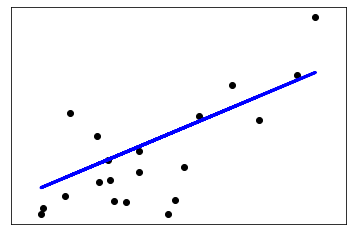

In [5]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercise

In this exercise, we will apply a linear regression to a materials science problem. 

<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_228265%2Fproject_354684%2Fimages%2Fx1.png">

The first part (creating a representation) can be performed in different ways, as we studied in the previous module. Today we will see the second part

Let's open a representation of a data set that we generated like yesterday and build a linear model for predicting some numerical property. The representation is the eigen values of the Coulomb matrix.

In [6]:
## The features in this data set are the eingen values of the Coulomb matr

import pandas as pd
data = pd.read_csv("data.csv",index_col=0)
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
O3NC4H5   134.383049  73.277431  65.565220  41.205339  37.971360  28.562170   
FONC6H4   135.762122  85.192934  61.375654  38.789150  36.309109  26.515954   
O2N2C5H4  139.214113  74.417269  49.828916  45.674170  37.000238  26.233309   
O3C6H4    137.466887  73.565364  61.518383  46.473325  32.476771  28.005426   
FON3C4H4  146.431978  83.548771  59.494132  50.055661  43.923242  31.137620   

          feature_6  feature_7  feature_8  feature_9  ...    homo    lumo  \
O3NC4H5   22.148475  19.541456   0.346183   0.246778  ... -0.2528 -0.0077   
FONC6H4   23.003822  20.931525  18.664159   0.345873  ... -0.2604 -0.0789   
O2N2C5H4  24.539204  23.079536  19.039277   0.343824  ... -0.2324 -0.0468   
O3C6H4    23.118138  20.294645  19.772588   0.349248  ... -0.2670 -0.0823   
FON3C4H4  23.795791  22.151400  19.093672   0.331518  ... -0.2192 -0.0309   

             gap         r2      zpve          U0           U           H  \
O3NC4H5   0.2451  1012.1864  0.095653 -435.725372 -435.718189 -435.717245   
FONC6H4   0.1815  1188.6441  0.089534 -460.774434 -460.767413 -460.766468   
O2N2C5H4  0.1856   945.7988  0.092456 -452.744414 -452.738132 -452.737188   
O3C6H4    0.1848   944.0426  0.090391 -456.613010 -456.606412 -456.605468   
FON3C4H4  0.1882  1074.3078  0.090835 -494.100913 -494.093709 -494.092765   

                   G      Cv  
O3NC4H5  -435.757266  26.019  
FONC6H4  -460.806377  25.848  
O2N2C5H4 -452.775716  23.374  
O3C6H4   -456.644392  24.902  
FON3C4H4 -494.132471  27.708  

[5 rows x 29 columns]

In [7]:
feature_names = data.columns[0:13]
print(feature_names)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12'],
      dtype='object')


In [8]:
molecules_X = data[feature_names]
molecules_y = data['gap']


# Split the data into training/testing sets (we will discuss this latter on)
molecules_X_train = molecules_X[:-2000]
molecules_X_test = molecules_X[-2000:]

# Split the targets into training/testing sets (we will discuss this latter on)
molecules_y_train = molecules_y[:-2000]
molecules_y_test = molecules_y[-2000:]

In [9]:
# dataset and algorithm 
from sklearn import datasets, linear_model

# quality measures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(molecules_X_train, molecules_y_train)

# Make predictions using the testing set
molecules_y_pred = regr.predict(molecules_X_test)

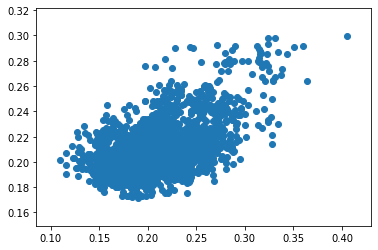

In [10]:
## Lets make a scatter plot of the true versus predicted values

plt.scatter(molecules_y_test,molecules_y_pred)

(array([508., 484., 364., 285., 175., 108.,  48.,  19.,   5.,   4.]),
 array([6.57534459e-05, 1.15205127e-02, 2.29752720e-02, 3.44300312e-02,
        4.58847905e-02, 5.73395498e-02, 6.87943090e-02, 8.02490683e-02,
        9.17038276e-02, 1.03158587e-01, 1.14613346e-01]),
 <a list of 10 Patch objects>)

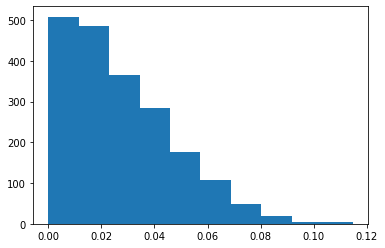

In [11]:
## and a histogram of the magnitude of the error
plt.hist(abs(molecules_y_test- molecules_y_pred))

In [12]:
# The intercept and coefficients
print('Intercept: {0:.2f} \n Coefficients: {1} \n'.format(regr.intercept_, regr.coef_))

# The mean squared error
print('Mean squared error: %.5f'
      % mean_squared_error(molecules_y_test, molecules_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(molecules_y_test, molecules_y_pred))

Intercept: 0.25 
 Coefficients: [ 8.12849803e-04 -1.03028728e-03 -9.85332103e-05  1.19988936e-03
 -4.89037868e-04 -4.57045254e-04 -2.04281125e-03 -1.43264786e-03
 -7.22503668e-04 -4.02626465e-02 -1.11831216e-01  2.96729799e-02
  1.21237161e-01] 

Mean squared error: 0.00115
Coefficient of determination: 0.2940


## Gradient Descent 

Although we can compute the coefficients $\mathbf{\theta}$ for a given data set, this approach has some restrictions:

  * To compute $(X^\intercal X)^{-1}$, the matrix $(X^\intercal X)$ has to be non-singular. 
  * Even if we can compute $(X^\intercal X)^{-1}$, this is computationally cost for large data sets. If we have $10.000$ data points for instance, $(X^\intercal X)^{-1}$ will have a dimension of $10.000 \times 10.000$, requiring a large ammount of memory to store it, and a very large computational time for its inversion. 

The gradient descent is a computational technique that can be used to minimize functions interativelly. The idea is as follow:

  1. Guess an initial value for $\mathbf{\theta}$.
  1. Compute the gradient of the error function at $\mathbf{\theta}$.
  1. Adjust the the value of $\mathbf{\theta}$ doing a "small step" in the oposite direction of the gradient.
  1. Repeat 2 and 3 untill convergence.

This process is illustrated in the picture bellow

![](https://miro.medium.com/proxy/1*wsBakfF2Geh1zgY4HJbwFQ.gif)

The size of the step in 3 is a parameter of the algorithm, and is known as **learning rate**. More formally, the update rule is:

$$ \mathbf{\theta}_{n+1} =  \mathbf{\theta}_{n} - \alpha \nabla_\theta E(\mathbf{\theta})$$

The learning rate $\alpha$ shoulde be choose wisely:
  * A very small learning rate may delay de convergence, requiring more iterations to converge.
  * A very large learning rate could diverge instead of converging, and we the minimum will not be reach.

The picture bellow illustrated the influence of the learning rate minimizing a quadratic function. The first two converge to the minimum, although the case in the middle converges more quickly. On the other hand, the third graph has a too high learning rate, and the gradient descent diverges from the minimum. 

![](https://miro.medium.com/proxy/1*Q-2Wh0Xcy6fsGkbPFJvMhQ.gif)

In general, the setting of the learning rate requires some experimentation. There are some approaches that uses a variable learning rate, aiming to speed up learning while avoiding divergence and local minimas (you can find more details [here](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB2_CIV-gradient_descent.html))






In [13]:
# Create a gradient descent linear regression model
# note that the learning rate is name eta0 in sklearn
# You can also choose the type of the learning rate
regr = linear_model.SGDRegressor(learning_rate='constant', eta0 = 0.001, max_iter=2000)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [14]:
# The intercept and coefficients
# They are a bit different from linear regression due to som numerical issues and regularization (discussed later)
print('Intercept: {0:.2f} \n Coefficients: {1:.2f} \n'.format(regr.intercept_[0], regr.coef_[0]))

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Intercept: 152.81 
 Coefficients: 660.64 

Mean squared error: 3024.76
Coefficient of determination: 0.37


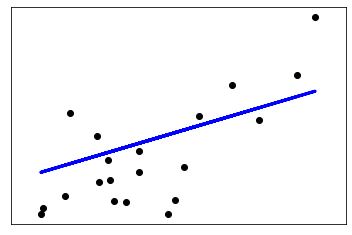

In [15]:
# Plot outputs
# The graph is similar to linear regression using ordinal least squares
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Polinomial Regression

Our model function need not be linear (a straight line) if that does not fit the data well.

We can change the behavior or curve of our model function by making it a quadratic, cubic or square root function (or other polinomial forms).

Recall that a linear model  is $pred_\theta(x) = \theta_0 + \theta_1 x$. We can create additional features based on $x$ to add higher order polimonial terms. For instance, if we want to include a quadratic term, then we can add an extra feature $x_i^2$ an run the least squares algorithm in the augmented data set to compute the quadratic model function $pred_\theta(x_i) = \theta_0 + \theta_1 x_i + \theta_2 x_i^2$. Similarly, if we want to also add a cubic function, we can add another extra feature $x_i^3$ so that the model function is now $pred_\theta(x) = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3$.


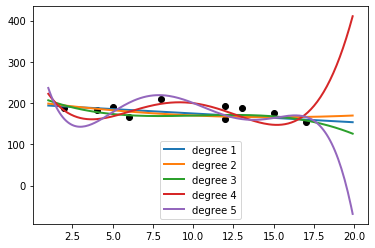

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# The, we load the linnedrud dataset
# This is a sample data set provided by sklearn
# You can use our own, as long as X is a matrix and y a vector with the same number of rows as X
linnerud_X, linnerud_y = datasets.load_linnerud(return_X_y=True)

# Use only one feature (this is not necessary, just for plotting)
linnerud_X = linnerud_X[:, np.newaxis, 0]
# Use only one feature (this is not necessary, just for plotting)
linnerud_y = linnerud_y[:, np.newaxis, 0]


# Split the data into training/testing sets (we will discuss this latter on)
linnerud_X_train = linnerud_X[-10:]
linnerud_X_test = linnerud_X[:-10]

# Split the targets into training/testing sets (we will discuss this latter on)
linnerud_y_train = linnerud_y[-10:]
linnerud_y_test = linnerud_y[:-10]


regr = linear_model.LinearRegression()

x_plot = np.array([np.arange(1,20,0.1)]).transpose()

plt.scatter(linnerud_X_test, linnerud_y_test,  color='black')


for count, degree in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), regr)
    model.fit(linnerud_X_train, linnerud_y_train)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, linewidth=2,
             label="degree %d" % degree)
    

plt.legend(loc='lower center')

plt.show()


In [17]:
regr = linear_model.LinearRegression()

model = make_pipeline(PolynomialFeatures(2), regr)
model.fit(molecules_X_train, molecules_y_train)

molecules_y_pred = model.predict(molecules_X_test)

# The mean squared error
print('Mean squared error: %.5f'
      % mean_squared_error(molecules_y_test, molecules_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(molecules_y_test, molecules_y_pred))

Mean squared error: 0.00110
Coefficient of determination: 0.33


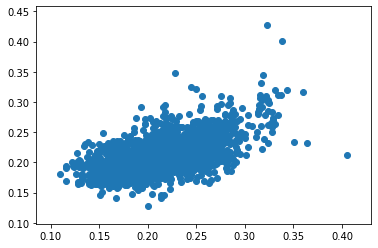

In [18]:
## Lets make a scatter plot of the true versus predicted values

plt.scatter(molecules_y_test,molecules_y_pred)

(array([926., 613., 288., 132.,  32.,   5.,   3.,   0.,   0.,   1.]),
 array([3.04527283e-06, 1.93773367e-02, 3.87516281e-02, 5.81259195e-02,
        7.75002109e-02, 9.68745023e-02, 1.16248794e-01, 1.35623085e-01,
        1.54997377e-01, 1.74371668e-01, 1.93745959e-01]),
 <a list of 10 Patch objects>)

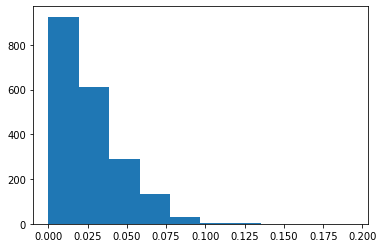

In [19]:
## and a histogram of the magnitude of the error
plt.hist(abs(molecules_y_test- molecules_y_pred))

## Regularization

The more features we have, the more freedom the algorithm has to fit the data. For instance, when doing polinomial regression, the higher the degree of polinomious we add, the more closely the algorithm can build a curve the pass through the data. 

Unfortonatelly, this flexibility cames with a price: the model can learn very well the training set, but may fail in predicting correctly out of the sample data points. This process is known as **overfitting**. 

However, reducing the number of features (e.g., reducing the degree of the polonima in the polinomial regression), we may have very simple models, which are not able to fit the data. This process is known as **underfitting**.


There is a trade-off between making the model more specific (capturing more information from the training set) or more geneal (aiming to generalize to out-of-the sample data). 


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png)

Regularization is a way to try to control this trade-off, adding a penalty to the parameters of the model

## Ridge Regression

In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the coefficients. The idea is not to remove features beforehand, but adding a penalty to the magnitude of coefficients of the regression. This make the coefficients "compete" to each other: if a coefficient increase, other have to decrease so that their sum does not increase to much. 

$$ \mathbf{\theta} = (X^\intercal X - \alpha I)^{-1} \cdot X^\intercal y$$

Where $\alpha$ is a parameter of the algorithm that controls the strenght of the regularization.

The example below experiments with different values of $\alpha$ for Rigid Regression


In [20]:
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
    regr = Ridge(alpha)
    model = make_pipeline(PolynomialFeatures(2), regr)
    
    model.fit(molecules_X_train, molecules_y_train)

    molecules_y_pred = model.predict(molecules_X_test)

    print('Mean squared error for alpha %.3f : %.6f '
      % (alpha, mean_squared_error(molecules_y_test, molecules_y_pred)))


Mean squared error for alpha 0.001 : 0.000924 
Mean squared error for alpha 0.010 : 0.000940 
Mean squared error for alpha 0.100 : 0.000945 
Mean squared error for alpha 1.000 : 0.000952 
Mean squared error for alpha 10.000 : 0.000969 
Mean squared error for alpha 100.000 : 0.000986 


## Kernels

The models we have seen so far are linear or ponomial. This restriction limits their usage for data sets which do not fit in this family of functions. 

In machine learning, a "kernel" usually refers to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data like to (hopefully) linearly separable ones. 

<img src=https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png width=300>


The RBF kernel is one exemple of a kernel used in machine learning. The ideia is to associate a Gaussian centered in each point of the training set, and compute the inverse of this Gaussian function w.r.t the other points:

<img src=https://1.bp.blogspot.com/-7Q4zKSMGLrs/WV1wGUIvjkI/AAAAAAAABz8/iqtQ9cDXEZsEuRmvJ6RajO9s_5vsJgdMQCLcBGAs/s1600/Capture2.PNG width=300> 

Examples which are closer to the reference example are mapped to a higher value, whereas examples which are far are mapped to a low value. 

<img src=https://4.bp.blogspot.com/-ddJ10zZUUwA/WV1wGTY3ucI/AAAAAAAABz4/C7Z16Q9moHI2SQ58OnHFG2I8DrXY5_viQCLcBGAs/s400/Capture3.PNG width=300>

The parameter $\sigma$ control the neighborhood ratio around the reference example.

Larger $\sigma$ takes into account distant examples

<img src=https://3.bp.blogspot.com/-hvDKbyVSp34/WV1wGUOkiMI/AAAAAAAAB0A/l4uWIfWGs2c2vT4vKPW5hKewzepkE4mBgCLcBGAs/s400/Capture4_Increease.PNG width=300>

While small $\sigma$ takes into account close examples


<img src=https://4.bp.blogspot.com/-1Mx-gnfE1ss/WV1wGonh-WI/AAAAAAAAB0E/lLoM51w9d_ICj0Pwu1yDqXDXF_S8AveFACLcBGAs/s400/Capture5_Decrease.PNG width=300>

The example next shows the use of Kernel Ridge Regression 

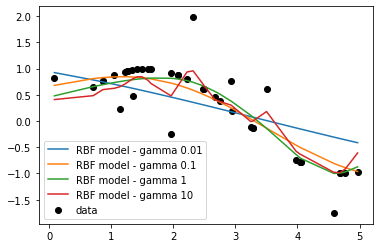

In [21]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared


###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))


plt.scatter(X, y, c='k', label='data')

for gamma in [0.01,0.1,1,10]:
    kr = KernelRidge(kernel='rbf',  gamma=gamma)
    kr.fit(X, y)
    kr_pred = kr.predict(X)
    plt.plot(X, kr_pred, label='RBF model - gamma '+str(gamma))
    
plt.legend()

As you have notice, the performance is very different depending on the value of $\gamma$. Tools like the [TPOP](https://github.com/EpistasisLab/tpot) may be used to select the right parameters.

## Neural Networks

Neural networks are modular models which pieces are connected according to some criteria. Pieces are called neurons and connections synapsis, due to the inspiration to the brain.

The simplest neural network consists of only one neuron and is called a perceptron, as shown in the figure below:

<img src="https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-2.png" width=400>

A perceptron has one input layer and one neuron. Input layer is responsible for receiving the inputs. The number of nodes in the input layer is equal to the number of features in the input dataset. Each input is multiplied with a weight (which is typically initialized with some random value) and the results are added together. 

The sum is then passed through an activation function. The activation function of a perceptron resembles the nucleus of human nervous system neuron. It processes the information and yields an output. In the case of a perceptron, this output is the final outcome. 


### Multilayer Perceptron

In the case of multilayer perceptrons, the output from the neurons in the previous layer serves as the input to the neurons of the proceeding layer. Therefore, multilayer perceptrons, or more commonly referred to as MLPs, are a combination of multiple neurons connected in the form a network. An artificial neural network has an input layer, one or more hidden layers, and an output layer. This is shown in the image below:

<img src=https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-3.png width=400>

A neural network executes in two phases: Feed-Forward and Back Propagation. In the feed-forward phase, the input is presented to the input layer. The input signal is then propagated till the output layer. During the training phase, the output is compared with the correct value, and the weights of different neurons are updated in a way that the difference between the desired and predicted output is as small as possible.

Let's try a neural net for predicting some properties of the molecules. MLP networks allow us to predict more than one output, so let's try.

In [22]:
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
O3NC4H5   134.383049  73.277431  65.565220  41.205339  37.971360  28.562170   
FONC6H4   135.762122  85.192934  61.375654  38.789150  36.309109  26.515954   
O2N2C5H4  139.214113  74.417269  49.828916  45.674170  37.000238  26.233309   
O3C6H4    137.466887  73.565364  61.518383  46.473325  32.476771  28.005426   
FON3C4H4  146.431978  83.548771  59.494132  50.055661  43.923242  31.137620   

          feature_6  feature_7  feature_8  feature_9  ...    homo    lumo  \
O3NC4H5   22.148475  19.541456   0.346183   0.246778  ... -0.2528 -0.0077   
FONC6H4   23.003822  20.931525  18.664159   0.345873  ... -0.2604 -0.0789   
O2N2C5H4  24.539204  23.079536  19.039277   0.343824  ... -0.2324 -0.0468   
O3C6H4    23.118138  20.294645  19.772588   0.349248  ... -0.2670 -0.0823   
FON3C4H4  23.795791  22.151400  19.093672   0.331518  ... -0.2192 -0.0309   

             gap         r2      zpve          U0           U           H  \
O3NC4H5   0.2451  1012.1864  0.095653 -435.725372 -435.718189 -435.717245   
FONC6H4   0.1815  1188.6441  0.089534 -460.774434 -460.767413 -460.766468   
O2N2C5H4  0.1856   945.7988  0.092456 -452.744414 -452.738132 -452.737188   
O3C6H4    0.1848   944.0426  0.090391 -456.613010 -456.606412 -456.605468   
FON3C4H4  0.1882  1074.3078  0.090835 -494.100913 -494.093709 -494.092765   

                   G      Cv  
O3NC4H5  -435.757266  26.019  
FONC6H4  -460.806377  25.848  
O2N2C5H4 -452.775716  23.374  
O3C6H4   -456.644392  24.902  
FON3C4H4 -494.132471  27.708  

[5 rows x 29 columns]

In [23]:
## variables to be predicted
outputs = ['homo','lumo','gap']

molecules_X = data[feature_names]
molecules_y = np.array(data[outputs])


# Split the data into training/testing sets (we will discuss this latter on)
molecules_X_train = molecules_X[:-2000]
molecules_X_test = molecules_X[-2000:]

# Split the targets into training/testing sets (we will discuss this latter on)
molecules_y_train = molecules_y[:-2000]
molecules_y_test = molecules_y[-2000:]

In [24]:
from sklearn.neural_network import MLPRegressor

## two hidden layers, with 20 neuros each
mlp = MLPRegressor(hidden_layer_sizes=(20,20),max_iter=1000)

mlp.fit(molecules_X_train,molecules_y_train)

molecules_y_pred = mlp.predict(molecules_X_test)

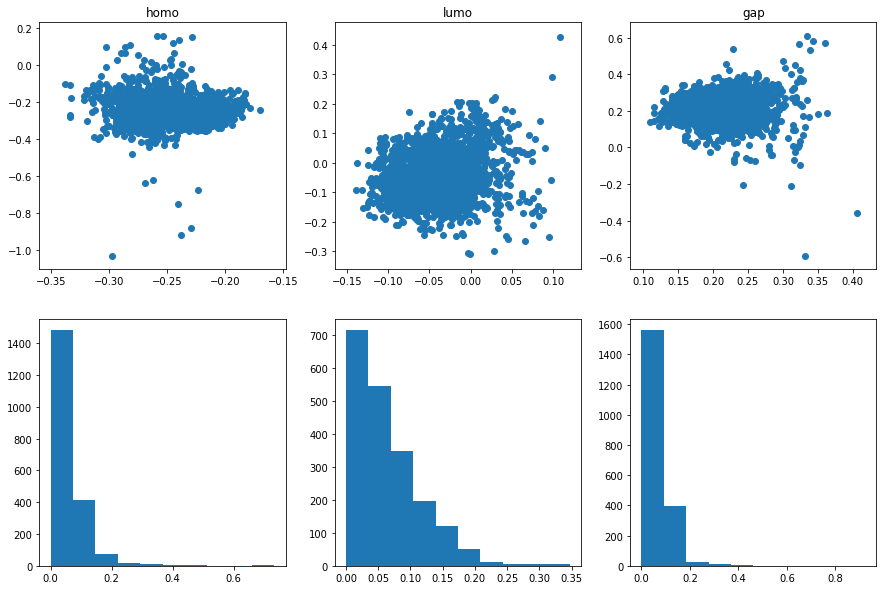

In [25]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
for i in range(3):
    ax[0,i].scatter(molecules_y_test[:,i],molecules_y_pred[:,i])
    ax[1,i].hist(abs(molecules_y_test[:,i]-molecules_y_pred[:,i]))
    ax[0,i].set_title(outputs[i])

## Classification

In classification, the target output is categorical instead of numerical. For example, we may predict a tumor as benign or malignant, or a piece of news in sports, economy, politics. In this part, we will use a neural network to predict the class of a flower named iris.

<img src = https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png width=500> 

In [26]:
from sklearn.datasets import load_iris

X_iris,y_iris = datasets.load_iris(return_X_y=True)

If we split the data directly selecting a contiguous subset, we will likely choose a bised sample. Some classes may not be present in the train or test sets. So we will use s different spliting schema. 

In [27]:
from sklearn.model_selection import train_test_split
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size = 0.20)


In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_iris_train, y_iris_train)

y_iris_pred = mlp.predict(X_iris_test)

One way to evaluated the prediction, we could tabulate the correct and incorrect classification in a confusion matrix:

<img src=https://miro.medium.com/max/462/1*7EYylA6XlXSGBCF77j_rOA.png>

where

- True Positive:

    Interpretation: You predicted positive and it’s true.
    You predicted that a woman is pregnant and she actually is.

- True Negative:

    Interpretation: You predicted negative and it’s true.
    You predicted that a man is not pregnant and he actually is not.

- False Positive: (Type I Error)

    Interpretation: You predicted positive and it’s false.
    You predicted that a man is pregnant but he actually is not.

- False Negative: (Type II Error)

    Interpretation: You predicted negative and it’s false.
    You predicted that a woman is not pregnant but she actually is.

[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


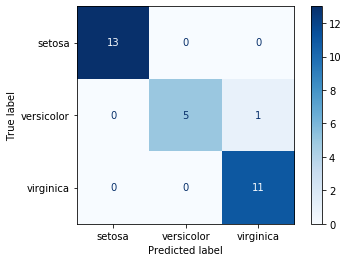

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_iris_test,y_iris_pred)
print(cm)
plot_confusion_matrix(mlp, X_iris_test, y_iris_test,
                      display_labels=['setosa','versicolor','virginica'],
                      cmap=plt.cm.Blues)


From the matrix, we can compute several performance measures, such as:

- Precision: Out of all the positive classes we have predicted correctly, how many are actually positive.
- Recall: Out of all the positive classes, how much we predicted correctly. It should be high as possible
- Accuracy: Out of all the classes, how much we predicted correctly
- F1: Harmonic mean of the Precision and Recall

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_iris_test,y_iris_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Cross validation

Using a single train/test split may have some problems dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

The idea is, instead of using a single train/test split, create a series of splits in the following way: in K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model.

<img src=http://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png>

In [31]:
from sklearn.model_selection import cross_validate

results = cross_validate(mlp,X_iris,y_iris,cv=5,scoring=['f1_macro','accuracy'])

In [32]:
print("Mean accuracy: {0:.3f}, Std accuracy: {1:.3f}".format(np.mean(results['test_accuracy']),
                                                         np.std(results['test_accuracy'])))

print("Mean F1: {0:.3f}, Std F1: {1:.3f}".format(np.mean(results['test_f1_macro']),
                                                         np.std(results['test_f1_macro'])))

Mean accuracy: 0.967, Std accuracy: 0.030
Mean F1: 0.967, Std F1: 0.030


## Learn more

- [Machine learning for phisicists (review)](https://arxiv.org/abs/1803.08823)
- [Machine learning for phisicists (review)](https://machine-learning-for-physicists.org/)
- [Sklearn](https://scikit-learn.org/)
- [TensorFlow Playground](https://playground.tensorflow.org/)